In [5]:
%load_ext autoreload
%autoreload 2

from datasets import DataCifar10
from models import MultiLayerNet
from optimers import OptimerSGD, OptimerAdam
from tuners import ParamTuner
from utils import check_accuracy, check_gradient
from utils import show_training_infos

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
# load data
dataloader = DataCifar10('./datasets/cifar-10-batches-py', norm_dis_mean=True, norm_div_std=False,
                         num_val=1000, num_train=4000, num_test=1000)
    
print('Training data shape: ', dataloader.x_train.shape)
print('Training labels shape: ', dataloader.y_train.shape)
print('Validating data shape: ', dataloader.x_val.shape)
print('Validating labels shape: ', dataloader.y_val.shape)
print('Testing data shape: ', dataloader.x_test.shape)
print('Testing labels shape: ', dataloader.y_test.shape)

Training data shape:  (4000, 32, 32, 3)
Training labels shape:  (4000,)
Validating data shape:  (1000, 32, 32, 3)
Validating labels shape:  (1000,)
Testing data shape:  (1000, 32, 32, 3)
Testing labels shape:  (1000,)


In [7]:
def get_init_model(hyperparams):
    return MultiLayerNet(32 * 32 * 3, 10, hyperparams=hyperparams, seed=100)

# init model
model = get_init_model(hyperparams={'reg': 0.6, 'nums_hidden': [80], 'dropout': 0.8})

# sanity check
loss = model.backward(dataloader.x_train[0: 100, :], dataloader.y_train[0: 100])
print('Sanity check result:')
print('Init loss is', loss)

# gradient check
for i in range(3):
    print('\nGradient check result - ', i + 1, ':')
    check_gradient(model, dataloader.x_train[0: 100, :], dataloader.y_train[0: 100])

# show structures
print('\nNet structures:')
for layer in model.layers:
    print(type(layer))

Sanity check result:
Init loss is 2.303325557373309

Gradient check result -  1 :
Layer | Key | Numerical gradient | Calculated gradient | Relative error
0 W 0.00021217783086058262 0.00021217757204260556 1.2198170462271193e-06
0 b 4.903633055164391e-06 4.9035908702224665e-06 8.602830371948807e-06
3 W -0.0008472003099058156 -0.0008472001918177099 1.3938629689974872e-07
3 b -0.009986347082602265 -0.009986347221309073 -1.388964413928808e-08

Gradient check result -  2 :
Layer | Key | Numerical gradient | Calculated gradient | Relative error
0 W -0.0011296146240624694 -0.0011296143884599816 2.0856892906128125e-07
0 b -3.6062264285874335e-06 -3.6063458827929705e-06 -3.312388434527617e-05
3 W 0.0013672489806992871 0.0013672492756292634 -2.1571048772247862e-07
3 b -0.009990920091240696 -0.00999092003677171 5.451848905187262e-09

Gradient check result -  3 :
Layer | Key | Numerical gradient | Calculated gradient | Relative error
0 W 0.00015016565768632972 0.0001501655939449469 4.24473860015860

## Model with dropout
Compare the model with and withou dropout.

In [21]:
# train model
param_model = {'reg': 0., 'nums_hidden': [500], 'dropout': None}
param_optim = {'learn_rate': 1e-4, 'learn_rate_decay': 0.95, 'num_iters': 1000, 'batch_size': 200}

param_model['dropout'] = None
model_no = get_init_model(param_model)
optimer_no = OptimerSGD(hyperparams=param_optim)
optimer_no.train(model_no, dataloader)

param_model['dropout'] = 0.5
model_5 = get_init_model(param_model)
optimer_5 = OptimerSGD(hyperparams=param_optim)
optimer_5.train(model_5, dataloader)

param_model['dropout'] = 0.2
model_2 = get_init_model(param_model)
optimer_2 = OptimerSGD(hyperparams=param_optim)
optimer_2.train(model_2, dataloader)

0 / 1000 loss is 2.3025983431999495
100 / 1000 loss is 2.297700812300868
200 / 1000 loss is 2.2789479697193484
300 / 1000 loss is 2.226838505105079
400 / 1000 loss is 2.1988676449069264
500 / 1000 loss is 2.1788359949954583
600 / 1000 loss is 2.100387455052092
700 / 1000 loss is 2.13565907455941
800 / 1000 loss is 2.090631780757674
900 / 1000 loss is 2.0698699576221435
0 / 1000 loss is 2.3026128316141774
100 / 1000 loss is 2.2970120142920094
200 / 1000 loss is 2.2791789324376577
300 / 1000 loss is 2.2289866560098197
400 / 1000 loss is 2.180538126114018
500 / 1000 loss is 2.1319524869556217
600 / 1000 loss is 2.145888737565077
700 / 1000 loss is 2.1131379309921385
800 / 1000 loss is 2.092568738406649
900 / 1000 loss is 2.0883146240809487
0 / 1000 loss is 2.3026213580053043
100 / 1000 loss is 2.297131635210608
200 / 1000 loss is 2.2799388791398223
300 / 1000 loss is 2.2265872672948035
400 / 1000 loss is 2.18109760997071
500 / 1000 loss is 2.1370904577770586
600 / 1000 loss is 2.157758756

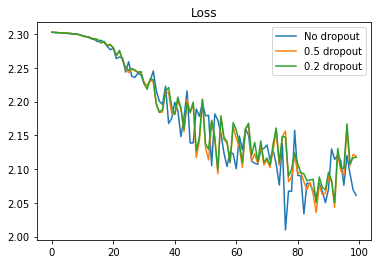

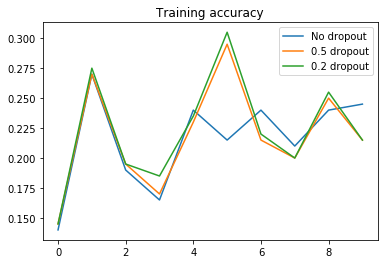

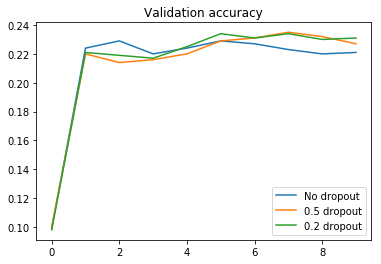

In [22]:
# plot loss curve
show_training_infos([optimer_no, optimer_5, optimer_2], 
                    legends=['No dropout', '0.5 dropout', '0.2 dropout'])

In [23]:
acc_no = check_accuracy(model_no.predict(dataloader.x_test), dataloader.y_test)
acc_5 = check_accuracy(model_5.predict(dataloader.x_test), dataloader.y_test)
acc_2 = check_accuracy(model_2.predict(dataloader.x_test), dataloader.y_test)

print('Accuracy for no dropout:', acc_no)
print('Accuracy for 0.5 dropout:', acc_5)
print('Accuracy for 0.2 dropout:', acc_2)

Accuracy for no dropout: 0.259
Accuracy for 0.5 dropout: 0.263
Accuracy for 0.2 dropout: 0.262
